# Classificatons

Most common supervised learning tasks are: <br>
 -   Regression : predict value <br>
 -   Classification : predict class
   
This Notebook is all about the detailed on techniquies responsible of making classifications madels for different data domains!

## Hello world data of classification : MNIST

`Scikit-Learn` provides many helper functions to download this data.

In [1]:
"""import modules"""
from sklearn.model_selection import cross_val_score # to measure performance, return the evaluation score
from sklearn.model_selection import cross_val_predict # returns the prediction made on each fold
from sklearn.base import BaseEstimator # to beat Nostradamus
from sklearn.metrics import confusion_matrix # evaluate the performance measure
from sklearn.metrics import precision_score, recall_score # compute classifier metrices
from sklearn.metrics import f1_score # evaluate model performance
from sklearn.metrics import precision_recall_curve # choose perfectt thresehold
from sklearn.metrics import roc_curve # receiver operating characteristics
from sklearn.metrics import roc_auc_score # to compare classifiers
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## Explanatory Data Analysis

In [2]:
"""import the data"""
mnist = fetch_openml("mnist_784", version = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
"""Understand the data"""
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-learn generally have a similar dictionary structure: such as,
- DESCR : describing the dataset
- data : contains one row per instance and one column per feature
- target : array with labels

In [4]:
"""Select the values"""
X = mnist['data'] #input value
y = mnist['target'] #output value

In [5]:
"""Shape of the values"""
print("Shape of the input data is: ",X.shape)
print("Shape of the onput data is: ",y.shape)

Shape of the input data is:  (70000, 784)
Shape of the onput data is:  (70000,)


In [6]:
"""Show some input data"""
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
"""Show some output data"""
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [8]:
"""Type of input and output values"""
print("Input data type is: {}\nand Output data type is {}".format(type(X),type(y)))

Input data type is: <class 'pandas.core.frame.DataFrame'>
and Output data type is <class 'pandas.core.series.Series'>


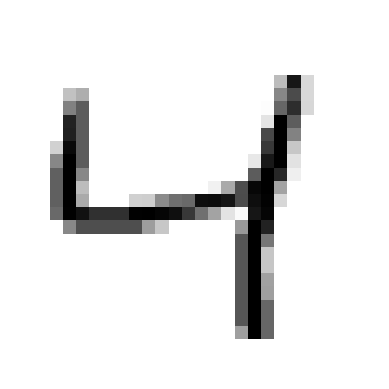

In [9]:
"""Plot a feature instances"""
check_a_digit = X.iloc[2]
check_a_digit_array = np.array(check_a_digit)
check_a_digit_image = check_a_digit_array.reshape(28, 28)

plt.imshow(check_a_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [10]:
"""Label or target at the index 4"""
y[2]

'4'

In [11]:
"""Convert target values to integer"""
y = y.astype(np.uint8)

In [12]:
"""train and test set"""
X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000], y[60000:]

## Binary Classification

## Training a binary classifier

In [13]:
"""making a binary data"""
y_train_4 = (y_train == 4) #false for other digits except 4
y_test_4 = (y_test == 4)

In [14]:
sgd_clf = SGDClassifier(random_state=42) #random_state = 42 for reproducible result
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(random_state=42)

In [15]:
"""detect number 4 : use 'check_a_digit' variable"""
sgd_clf.predict([check_a_digit])

array([ True])

## Measuring Accuracy
Evaluating a classifier is harder than evaluating a regressor.

### Accuracy by using `cross validation`:

In [16]:
"""using cross validation"""
cross_val_score(sgd_clf, X_train, y_train_4, cv = 3, scoring = "accuracy")

array([0.9671 , 0.97645, 0.9687 ])

**Note:**
- Nostradamus: performance measure of a classifier doesn't fully measured by the performance. in the up we can see the accuracy is +-95% in every fold, where only 10% data is equal to 4.

In [17]:
class ClassifierNot4(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [18]:
clf_not4 = ClassifierNot4()
cross_val_score(clf_not4, X_train, y_train_4, cv = 3, scoring = "accuracy")

array([0.90275, 0.9018 , 0.90335])

### Confusion Matrix
[Click here to know more about it](https://en.wikipedia.org/wiki/Confusion_matrix)

In [19]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3)

In [20]:
confusion_matrix(y_train_4, y_train_predict)

array([[52957,  1201],
       [  554,  5288]])

**Note:** A perfect classifier have only true positive and true negative. Main diagonal is non zero. For example:

In [21]:
y_train_perfect_predict = y_train_4 #assumed we get perfect model
confusion_matrix(y_train_4, y_train_perfect_predict)

array([[54158,     0],
       [    0,  5842]])

### Precision and Recall : compute classifier metrices

In [22]:
precision_score(y_train_4, y_train_predict)

0.8149175527816305

In [23]:
recall_score(y_train_4, y_train_predict)

0.905169462512838

### F1 score : harmonic mean of precison and recall
- Bect way to compare classifiers
- F1 score will high only if the precision and recall are high
- Model with high f1 score is good

In [24]:
f1_score(y_train_4, y_train_predict)

0.8576757764982564

### Precision/Recall Tradeoff : increasing precision reduces recall
- Images are by their classifier scors
- The images between the threseholds considered positive
- Higher thresehold = lower recall, and higher precision

Scikit-learn does not gives the opportunity to set the thresehold directly. Instread:
- Use `cross_val_predict` to return decision scores of all instances in the training set
- use those decision scores in `precision_recall_curve` to compute prediction for all threseholds.

**Note:** main task is to find out the best thresehold for precision/recall tradeoff

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv = 3, method = "decision_function")

In [26]:
y_scores

array([-31754.76525516, -26393.82888302,   2160.11030898, ...,
       -19439.69962707, -10979.35873154, -22487.33775957])

In [27]:
precision, recall, threseholds = precision_recall_curve(y_train_4, y_scores)

In [28]:
"""using matplotlib to plot"""
def PrecisionRecallTradeoff(precision, recall, threseholds):
    """
    The function will plot precision and recall against threseholds

    parameters
    ----------
    precision : array
    recall : array

    Output
    ------
    Show the plot

    """
    plt.plot(threseholds, precision[:-1], "b--", label = "Precision")
    plt.plot(threseholds, recall[:-1], "g--", label = "Recall")
    plt.xlabel("Threseholds")
    plt.ylabel("Values")
    plt.title("Precision and Recall against Threseholds")
    plt.legend()
    plt.grid()
    plt.show()

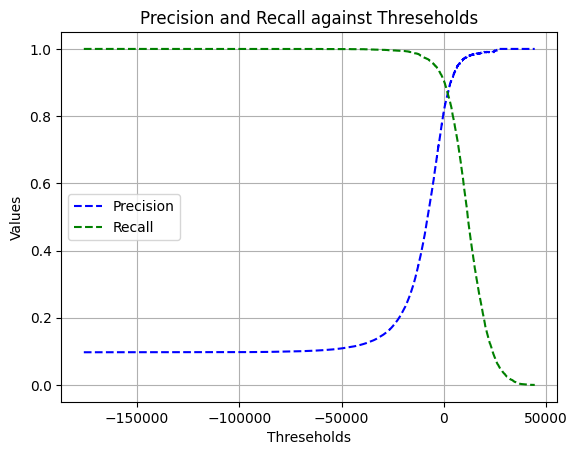

In [29]:
PrecisionRecallTradeoff(precision, recall, threseholds)

**Note:** Another way to choose good precision/recall tradeoff is to plot precision against recall.

In [30]:
"""using matplotlib to plot"""
def PrecisionVsRecall(precision, recall):
    """
    The function will plot precision against recall

    parameters
    ----------
    precision : array
    recall : array

    Output
    ------
    Show the plot

    """
    plt.plot(recall[:-1], precision[:-1],"b--")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision against Recall")
    plt.grid()
    plt.show()

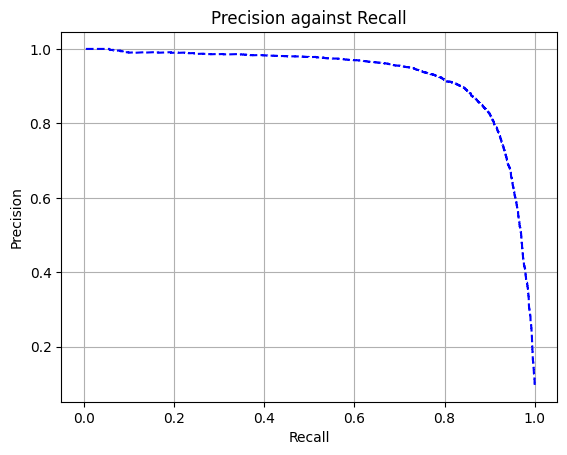

In [31]:
PrecisionVsRecall(precision, recall)

**If we need a fixed precision, then we should also decide what recall we are considering for our model. It depends on the ongoing project requirments. Assume we need a model with 90% precision:**

In [32]:
threshold_90_precision = threseholds[np.argmax(precision >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
precision_score(y_train_4, y_train_pred_90)

0.9001287474710318

In [34]:
recall_score(y_train_4, y_train_pred_90)

0.8377268058883944

### ROC Curve : Receiver operating Characteristics
- common tool with binary classifier
- plot true positive rate against false positive rate
- it gives AUC (area under the curve)

In [35]:
fpr, tpr, threseholds = roc_curve(y_train_4, y_scores)

In [36]:
"""function to plot"""
def RocCurve(fpr, tpr, label = None):
    """
    The function will plot True positive rate against False positive rate

    parameters
    ----------
    tpr : array
    fpr : array

    Output
    ------
    Show the plot

    """
    plt.plot(fpr, tpr,linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--") # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.grid()
    plt.show()

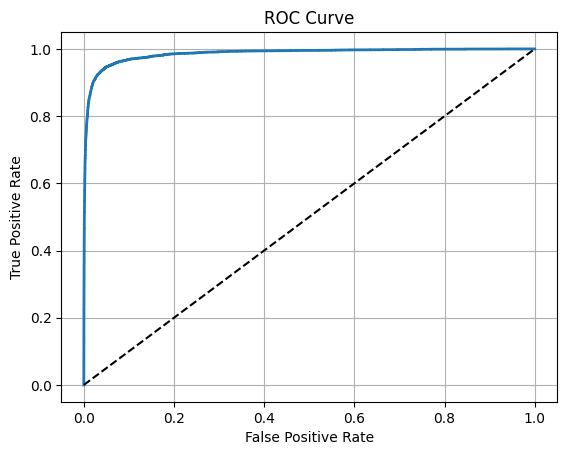

In [37]:
RocCurve(fpr, tpr)

**AUC : Generally use to compare classifier scores to choose the good model available at the point. Train `RandomForsetClassifier` and Compare it with the available `SGDClassifier`.**

In [38]:
roc_auc_score(y_train_4, y_scores)

0.9859276923382874

In [39]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv = 3, method="predict_proba")

**Note:** Roc curve expects labels and scores, but class probabilities can also use instread of scores

In [40]:
y_scores_forest = y_probas_forest[:,1] # score = probability of positive class
fpr_forset, tpr_forest, threseholds_forest = roc_curve(y_train_4, y_scores_forest)

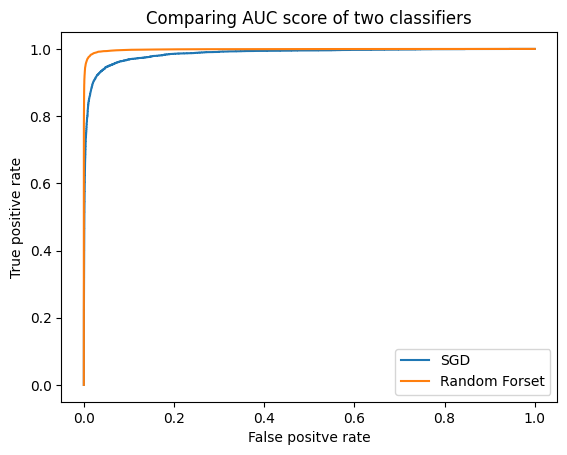

In [41]:
plt.plot(fpr, tpr, label = "SGD")
plt.plot(fpr_forset, tpr_forest, label = "Random Forset")
plt.xlabel("False positve rate")
plt.ylabel("True positive rate")
plt.title("Comparing AUC score of two classifiers")
plt.legend(loc = "lower right")
plt.show()

**Random Forset ROC curve is better than SGD, because it's closer to 1. Hence, the AUC should be better for Random Forest than SGD.**

In [42]:
roc_auc_score(y_train_4, y_scores_forest)

0.9982278527638186

## Multiclass Clasifications
- multiclass classifiers distinguish between more than two classes
- one-versus-the-rest (OvR) or one-versus-all (OvA) Strategy
- one-versus-one (OvO) strategy (faster to train)
- for most binary classification algorithms, OvR is preferred

**Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvR or OvO, depending on the algorithm.**

In [43]:
"""Import modules"""
from sklearn.svm import SVC

In [44]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(random_state=42)

In [45]:
"""Scikit-Learn used the OvO strategy and trained 45 binary classifiers"""
svm_clf.predict([check_a_digit])

array([4], dtype=uint8)

In [46]:
some_digit_scores = svm_clf.decision_function([check_a_digit])
some_digit_scores.round(2)

array([[ 1.76, -0.29,  7.23,  1.89,  9.3 ,  4.94,  3.84,  6.1 ,  1.75,
         8.19]])

**Note:** the highest number is 9.3, it's the one corresponding to class 4, see the below:

In [47]:
class_id = some_digit_scores.argmax()
class_id

4

In [48]:
"""look up the class label """
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [49]:
svm_clf.classes_[class_id] # should return 4

4

**Multiclass classifier using the OvR strategy, based on an SVC**

In [50]:
"""import module"""
from sklearn.multiclass import OneVsRestClassifier

In [51]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [52]:
"""make a prediction"""
ovr_clf.predict([check_a_digit])

array([4], dtype=uint8)

In [53]:
len(ovr_clf.estimators_)

10

**Training an SGDClassifier on multiclass dataset : make predictions**

In [54]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([check_a_digit])

array([4], dtype=uint8)

In [55]:
sgd_clf.decision_function([check_a_digit]).round()

array([[-34143., -21942.,  -4018.,  -2239.,     43., -15059., -33653.,
         -8278.,  -7461., -14180.]])

In [56]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") #evaluate the model

array([0.87365, 0.85835, 0.8689 ])

**Note:** scaling the inputs increases accuracy

In [57]:
# import module, transform dataset, calculate accuracy

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Error Analysis

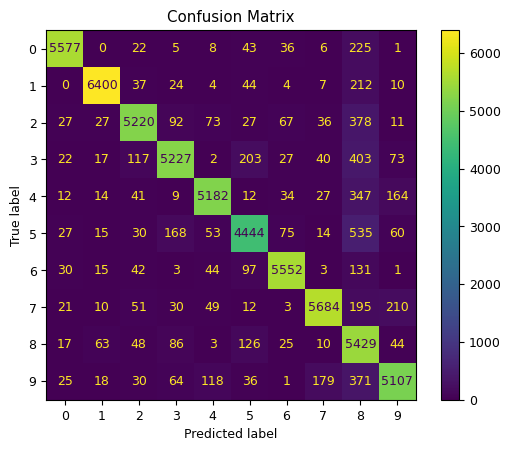

In [58]:
# using confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Confusion Matrix")
plt.show()

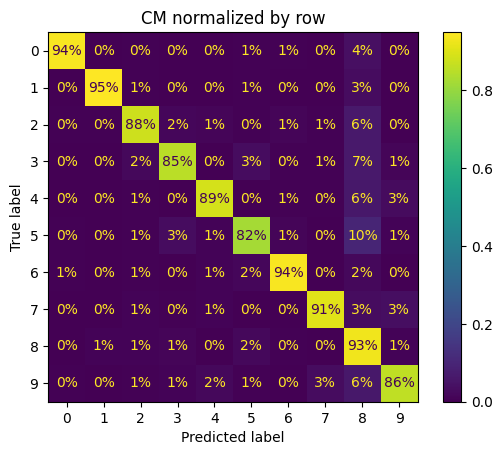

In [60]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.title("CM normalized by row")
plt.show()

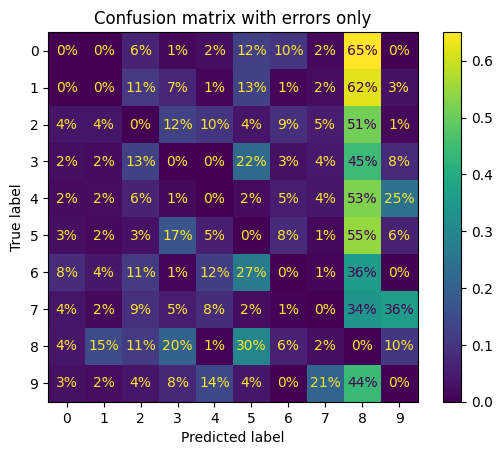

In [62]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # for good text
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.title("Confusion matrix with errors only")
plt.show()

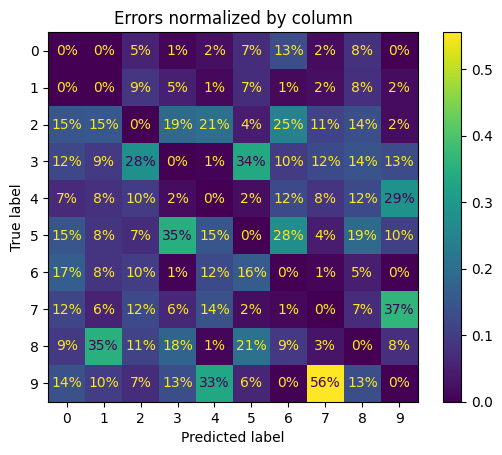

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
plt.title("Errors normalized by column")
plt.rc('font', size=14)
plt.show()

## Multilabel Classifications

In [75]:
# KNeighborsClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming y_train is an array of numerical values
y_train_large = (y_train >= 7)  # Compare with the number 7, not the string '7'
y_train_odd = (y_train.astype('int8') % 2 == 1)  # Determine if the label is odd

# Create a multilabel target array (large and odd)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Initialize and fit the KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

In [76]:
KNeighborsClassifier()

KNeighborsClassifier()

In [80]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") # gives score

0.976410265560605

In [81]:
"""shows that we get a negligible performance improvement
   when `average="weighted"` because the classes are already
   well balanced.
"""
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [82]:
# ChainClassifier with cross-validation
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [83]:
ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

## Multioutput Classification
-  It is a generalization of multilabel classification where each label can be multiclass

**Note:** That was the main base concepts to use in many different domains! Thank You!